In [1]:
'''Age Vs Salary Classification either obove 50k or less 50k through logistic regression classification'''

'Age Vs Salary Classification either obove 50k or less 50k through logistic regression classification'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv(r'../input/adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          48842 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         48842 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     48842 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
df.rename(columns={'hours-per-week':'Working_Hour'}, inplace = True)
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'Working_Hour', 'native-country',
       'income'],
      dtype='object')

In [7]:
dummies = pd.get_dummies(df.income)
dummies.head()

,<=50K,>50K
0,1,0
1,1,0
2,0,1
3,0,1
4,1,0


In [8]:
df_dummies = pd.concat([df,dummies],axis ='columns')
df_dummies.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,Working_Hour,native-country,income,<=50K,>50K
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,1,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,1,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,0,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,0,1
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K,1,0


In [9]:
df_dummies.drop(columns = ['fnlwgt','educational-num','marital-status','relationship','capital-gain','capital-loss'], inplace = True)
df_dummies.head()

,age,workclass,education,occupation,race,gender,Working_Hour,native-country,income,<=50K,>50K
0,25,Private,11th,Machine-op-inspct,Black,Male,40,United-States,<=50K,1,0
1,38,Private,HS-grad,Farming-fishing,White,Male,50,United-States,<=50K,1,0
2,28,Local-gov,Assoc-acdm,Protective-serv,White,Male,40,United-States,>50K,0,1
3,44,Private,Some-college,Machine-op-inspct,Black,Male,40,United-States,>50K,0,1
4,18,?,Some-college,?,White,Female,30,United-States,<=50K,1,0


In [10]:
 df_dummies.rename(columns = {'<=50K':'Less_than_50K','>50K':'More_than_50K'}, inplace = True)
    

In [11]:
df_dummies.head()

,age,workclass,education,occupation,race,gender,Working_Hour,native-country,income,Less_than_50K,More_than_50K
0,25,Private,11th,Machine-op-inspct,Black,Male,40,United-States,<=50K,1,0
1,38,Private,HS-grad,Farming-fishing,White,Male,50,United-States,<=50K,1,0
2,28,Local-gov,Assoc-acdm,Protective-serv,White,Male,40,United-States,>50K,0,1
3,44,Private,Some-college,Machine-op-inspct,Black,Male,40,United-States,>50K,0,1
4,18,?,Some-college,?,White,Female,30,United-States,<=50K,1,0


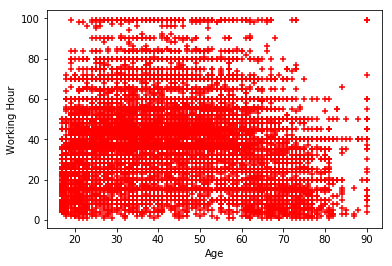

In [12]:
plt.xlabel('Age')
plt.ylabel('Working Hour')
plt.scatter(df.age,df.Working_Hour,marker='+',color='red')

In [13]:
from sklearn.model_selection import train_test_split


In [14]:
X_train, X_test, y_train, y_test = train_test_split(df_dummies[['age']],df_dummies[['income']],train_size=0.8)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [15]:
X_train.head()

,age
3918,22
33391,49
12714,40
38444,21
16135,26


In [16]:
X_test.head()

,age
11738,19
9306,35
24040,41
31057,34
25324,21


In [17]:
y_train.head()

,income
3918,<=50K
33391,>50K
12714,<=50K
38444,<=50K
16135,<=50K


In [18]:
y_test.head()

,income
11738,<=50K
9306,<=50K
24040,<=50K
31057,<=50K
25324,<=50K


In [19]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [20]:
model.fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [21]:
y_predicted = model.predict(X_test)
y_predicted

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

In [22]:
model.predict_proba(X_test)

array([[0.88045212, 0.11954788],
       [0.79755229, 0.20244771],
       [0.75702652, 0.24297348],
       ...,
       [0.82729584, 0.17270416],
       [0.88450714, 0.11549286],
       [0.8582952 , 0.1417048 ]])

In [23]:
model.score(X_test,y_test)

0.7455215477530965